## HSV 

In [6]:
request_sensor = ["S1","S2","S3-AIR","S4","S5","S6","S7","S8","S9","S10"]
filetif = ['.tif']
filetif_hsv,requested_path_hsv = hsv_tif(filetif)

requested_names_hsv, requested_shapes_hsv, ls_mask_image_hsv, ls_out_transform_hsv,Piren_VIS_hsv,sensor_coord = requested_VIS_AOI(filetif_hsv,request_sensor,2)

./traitement_PIREN/vis_piren_phase_HSV.tif
['./traitement_PIREN/vis_piren_phase_HSV.tif']
nombre de shapes 10


In [8]:
dict_windows_hsv, ls_windows_param_hsv = reading_3band(10)

Taille de la fenetre : 252 x 252


In [11]:
dict_windows_hsv["S1"]

,x,y,band 1,band 2,band 3,SensorName
0,523658,5.36628e+06,0.954546,0.055,0.59606,S1
1,523658,5.36628e+06,0.958333,0.0588236,0.597665,S1
2,523658,5.36628e+06,0.983333,0.0502513,0.596167,S1
3,523658,5.36628e+06,0.966667,0.0537635,0.596424,S1
4,523658,5.36628e+06,0.966667,0.0574712,0.597772,S1
...,...,...,...,...,...,...
63499,523668,5.36629e+06,0.892857,0.0689655,0.595685,S1
63500,523668,5.36629e+06,0.892857,0.0654205,0.594727,S1
63501,523668,5.36629e+06,0.871795,0.0585585,0.591367,S1
63502,523668,5.36629e+06,0.902778,0.0547946,0.592529,S1


In [81]:
# Recherche à l'interieur d'un DICT 
for windows in dict_windows_hsv :
    print(dict_windows_hsv[windows]["SensorName"][0])
print(dict_windows_hsv.keys())
print(dict_windows_hsv.get(windows))

S10
S1
S9
S2
S4
S5
S8
S7
S6
S3-AIR
dict_keys(['S10', 'S1', 'S9', 'S2', 'S4', 'S5', 'S8', 'S7', 'S6', 'S3-AIR'])
          x            y    band 1     band 2    band 3 SensorName
0    523632  5.36631e+06  0.142857  0.0360825  0.585321     S3-AIR
1    523632  5.36631e+06  0.166667  0.0270269  0.582551     S3-AIR
2    523632  5.36631e+06  0.166667  0.0274726  0.582636     S3-AIR
3    523632  5.36631e+06  0.133333   0.026178  0.583422     S3-AIR
4    523633  5.36631e+06  0.208334  0.0189573  0.581928     S3-AIR
..      ...          ...       ...        ...       ...        ...
247  523642  5.36632e+06  0.316667  0.0526316   0.59708     S3-AIR
248  523642  5.36632e+06  0.309524  0.0732984  0.604446     S3-AIR
249  523642  5.36632e+06  0.321428  0.0769231  0.606974     S3-AIR
250  523642  5.36632e+06  0.305556  0.0674157  0.601874     S3-AIR
251  523642  5.36632e+06  0.322917  0.0903955  0.612556     S3-AIR

[252 rows x 6 columns]


In [17]:
dict_windows_hsv[target]["x"]

0        523649
1        523649
2        523649
3        523649
4        523649
          ...  
63499    523659
63500    523659
63501    523659
63502    523659
63503    523659
Name: x, Length: 63504, dtype: object

In [82]:
ls_band = []
for target in dict_windows_hsv :
    print(target)
    coords = np.array([dict_windows_hsv[target]["x"],dict_windows_hsv[target]["y"]]).T
    band_3 = [dict_windows_hsv[target]["band 1"],
              dict_windows_hsv[target]["band 2"],
              dict_windows_hsv[target]["band 3"]]
    ls_band.append(band_3)

S10
S1
S9
S2
S4
S5
S8
S7
S6
S3-AIR


In [57]:
dict_windows_hsv['S10']

,x,y,band 1,band 2,band 3,SensorName
0,523649,5.36631e+06,0.333333,0.0718231,0.606002,S10
1,523649,5.36631e+06,0.345238,0.0786517,0.607664,S10
2,523649,5.36631e+06,0.345238,0.0786517,0.607664,S10
3,523649,5.36631e+06,0.322222,0.082873,0.609438,S10
4,523649,5.36631e+06,0.333333,0.0765028,0.60794,S10
...,...,...,...,...,...,...
63499,523659,5.36632e+06,0.388889,0.0784314,0.603303,S10
63500,523659,5.36632e+06,0.388889,0.0764331,0.602622,S10
63501,523659,5.36632e+06,0.421569,0.103659,0.607653,S10
63502,523659,5.36632e+06,0.431373,0.103659,0.606352,S10


In [28]:
nb_lag = 25
max_lag = 10
### Permet de modifier les paramètres du vario 
dict_variogram_hsv = {}
for target in dict_windows_hsv :
    print(target)
    coords = np.array([dict_windows_hsv[target]["x"],dict_windows_hsv[target]["y"]]).T
    values_1 = dict_windows_hsv[target]["band 1"]
    values_2 = dict_windows_hsv[target]["band 2"]
    values_3 = dict_windows_hsv[target]["band 3"]
    
    V1 = Variogram(coords,values_1,
                   model = "spherical",n_lags=nb_lag,maxlag=max_lag )


S10


MemoryError: Unable to allocate 15.0 GiB for an array with shape (2016347256,) and data type float64

In [22]:
dict_variogram_hsv = {}
for target in dict_windows_hsv :
    print(target)
    coords = np.array([dict_windows_hsv[target]["x"],dict_windows_hsv[target]["y"]]).T
    values_1 = dict_windows_hsv[target]["band 1"]
    values_2 = dict_windows_hsv[target]["band 2"]
    values_3 = dict_windows_hsv[target]["band 3"]

S10
S1
S9
S2
S4
S5
S8
S7
S6
S3-AIR


In [25]:
 V1

NameError: name 'V1' is not defined

### Variogramme toutes les targets

C:\Users\Alexandre\anaconda3\lib\site-packages\skgstat\plotting\variogram_plot.py:96: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Alexandre\anaconda3\lib\site-packages\skgstat\plotting\variogram_plot.py:96: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Alexandre\anaconda3\lib\site-packages\skgstat\plotting\variogram_plot.py:96: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Alexandre\anaconda3\lib\site-packages\skgstat\plotting\variogram_plot.py:96: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Alexandre\anaconda3\lib\site-packages\s

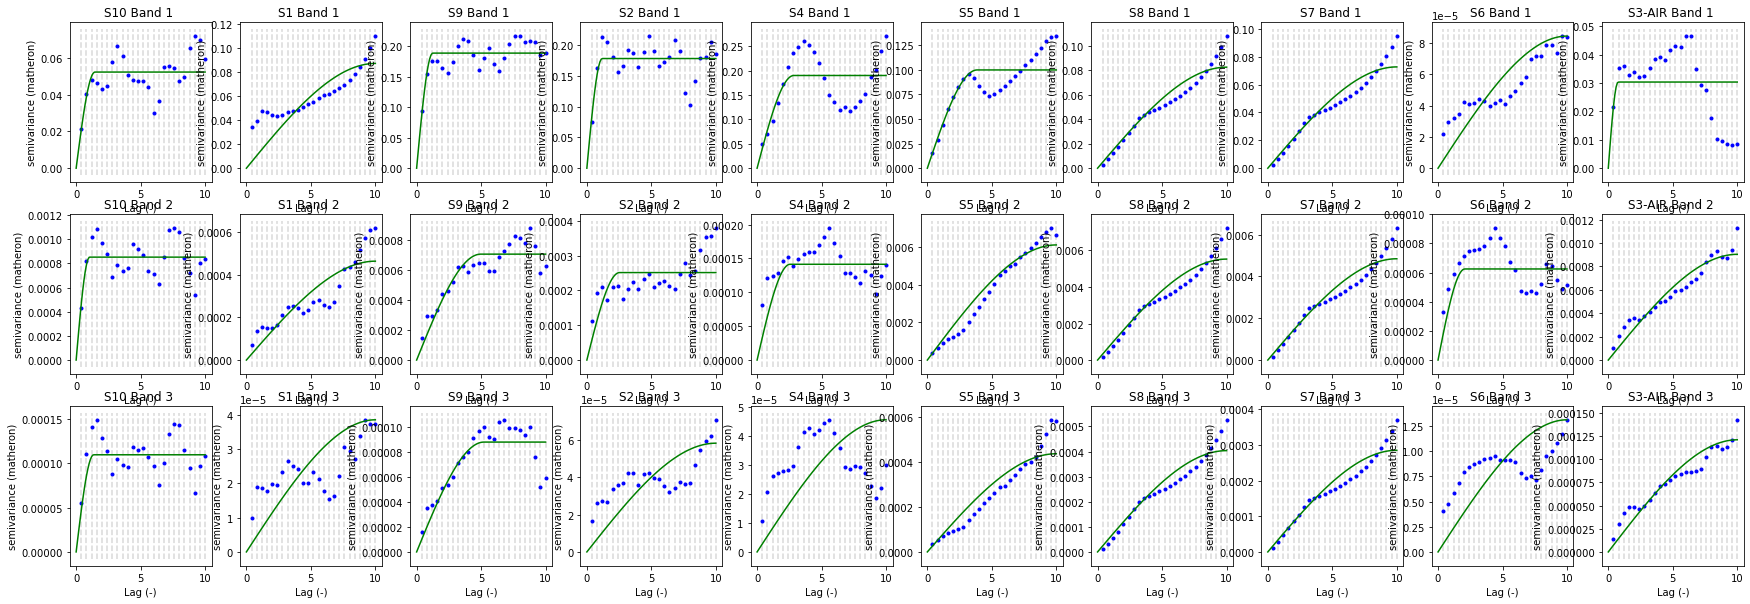

In [85]:
fig2,axvar = plt.subplots(3,len(dict_variogram),figsize=(30,10))

for i,target in enumerate(dict_variogram_hsv) :
    V1 = dict_variogram_hsv[target]["V1"]
    V2 = dict_variogram_hsv[target]["V2"]
    V3 = dict_variogram_hsv[target]["V3"]
    
    V1.plot(axes = axvar[0,i])
    axvar[0,i].set_title(target + ' Band 1 ')

    V2.plot(axes = axvar[1,i])
    axvar[1,i].set_title(target + ' Band 2 ')

    V3.plot(axes = axvar[2,i])
    axvar[2,i].set_title(target + ' Band 3 ')
    

### Target(s)

C:\Users\Alexandre\anaconda3\lib\site-packages\skgstat\plotting\variogram_plot.py:96: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Alexandre\anaconda3\lib\site-packages\skgstat\plotting\variogram_plot.py:96: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Alexandre\anaconda3\lib\site-packages\skgstat\plotting\variogram_plot.py:96: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Alexandre\anaconda3\lib\site-packages\skgstat\plotting\variogram_plot.py:96: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Alexandre\anaconda3\lib\site-packages\s

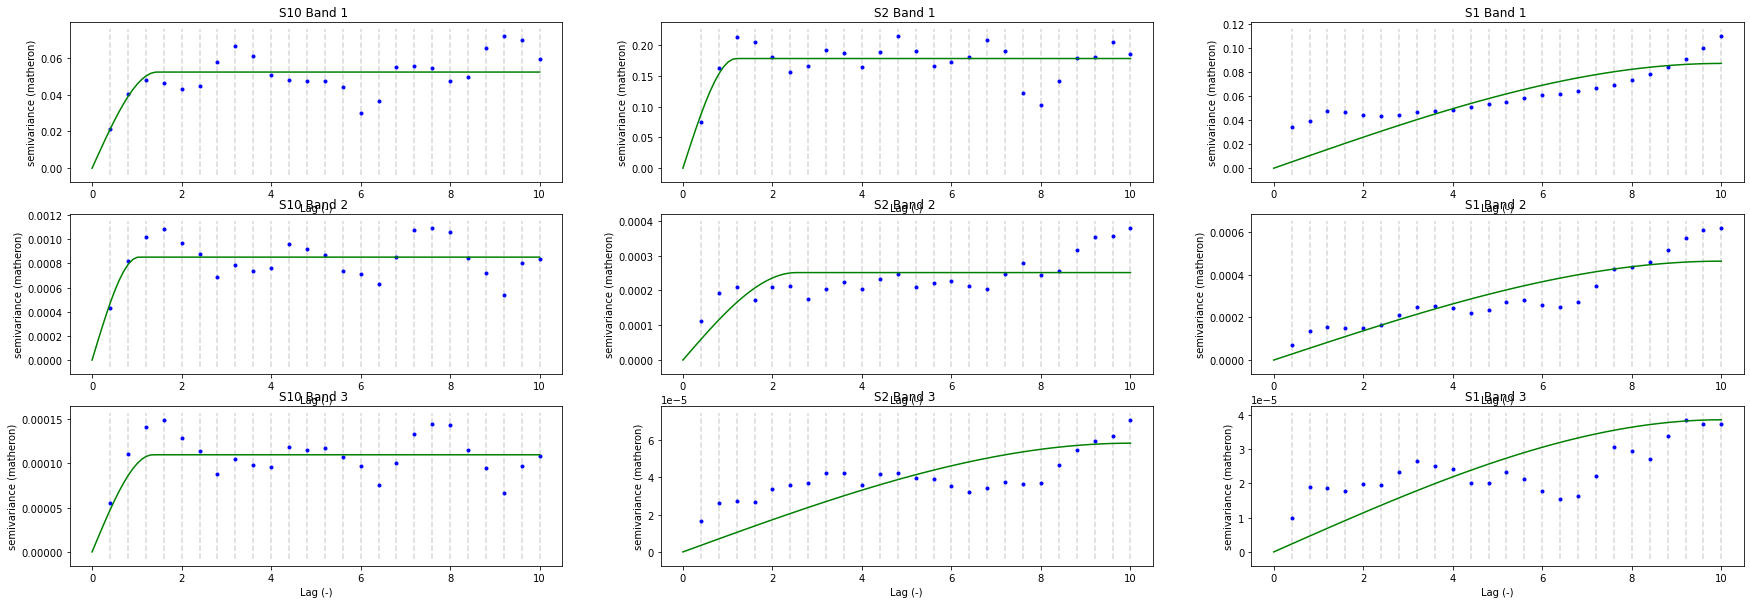

In [86]:
requested_dict_variogram = {}
requested_target = ["S10","S2","S1"]
for target in requested_target :
    requested_dict_variogram[target] = dict_variogram_hsv[target]

fig3,axvar = plt.subplots(3,len(requested_dict_variogram),figsize=(30,10))

for i,target in enumerate(requested_dict_variogram) :
    V1 = dict_variogram[target]["V1"]
    V2 = dict_variogram[target]["V2"]
    V3 = dict_variogram[target]["V3"]
    
    V1.plot(axes = axvar[0,i])
    axvar[0,i].set_title( target + ' Band 1 ')

    V2.plot(axes = axvar[1,i])
    axvar[1,i].set_title(target + ' Band 2 ')

    V3.plot(axes = axvar[2,i])
    axvar[2,i].set_title(target + ' Band 3 ')
    

In [99]:
values_1 = DATA_WINDOW["band 1"]
values_2 = DATA_WINDOW["band 2"]
values_3 = DATA_WINDOW["band 3"]

## Visible

In [1]:
import os
import  matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import rasterio as rio
from rasterio.plot import plotting_extent
from rasterio.plot import show
from rasterio.plot import show_hist # Useful if you wish to plot all hist and GPS target image
from rasterio.mask import mask
from rasterio.windows import Window
from shapely.geometry.point import Point
import shapely
import numpy as np
import csv
import fiona
import geostatspy.GSLIB as GSLIB
import geostatspy.geostats as geostats 

from tools_AA_IR import reading_gps_file, circle_sensor, plottingtemp_single_label_IR
from tools_AA_IR import path_IR, get_tif,get_value_IR 
from tools_AA_IR import circle_to_shape, readingIR , IR_mask, readingIR_all
from tools_AA import readingtemp_AA, slice_raw, path_sonde, name_sonde, plottingtemp_single_label
from tools_EL import readingtemp, plottingtemp
from tools_AA_VIS import readingVIS,VIS_mask , norm, requested_VIS_AOI,norm_tif,get_requested_tif,hsv
from tools_AA_VIS import hsv_tif,hsv, requested_VIS_AOI_Random
from tools_AA_variograms import reading_3band
import skgstat as skg
from skgstat import Variogram

In [2]:
request_sensor = ["S1","S2","S3-AIR","S4","S5","S6","S7","S8","S9","S10"]
filetif = ['.tif']
filetif_norm,requested_path_norm = norm_tif(filetif)
requested_names_norm, requested_shapes_norm, ls_mask_image_norm, ls_out_transform_norm,Piren_VIS_norm,sensor_coord = requested_VIS_AOI(filetif_norm,request_sensor,2)

./traitement_PIREN/vis_piren_phase_normalized.tif
['./traitement_PIREN/vis_piren_phase_normalized.tif']
nombre de shapes 10


In [3]:
dict_windows_norm, ls_windows_param_norm = reading_3band(10,requested_path_norm)

Taille de la fenetre : 252 x 252
63504
63504
63504
63504
63504
63504
63504
63504
63504
63504


NameError: name 'x' is not defined

## Variogramme

In [5]:
max_   = 100
nb_lag = 25
V1 = Variogram(coords,values_1,
              model = "spherical",n_lags=nb_lag )

V2 = Variogram(coords,values_2,
              model = "spherical",n_lags=nb_lag)

V3 = Variogram(coords,values_3,
              model = "spherical",n_lags=nb_lag )


fig2,axvar = plt.subplots(2,3,figsize=(30,10))


V1.plot(axes = axvar[:,0])
axvar[0,0].set_title('Band 1')

V2.plot(axes = axvar[:,1])
axvar[0,1].set_title('Band 2')

V3.plot(axes = axvar[:,2])
axvar[0,2].set_title('Band 3')

NameError: name 'coords' is not defined

C:\Users\Alexandre\anaconda3\lib\site-packages\skgstat\plotting\variogram_dd_plot.py:49: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


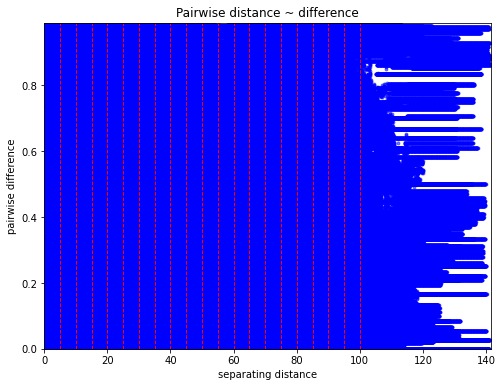

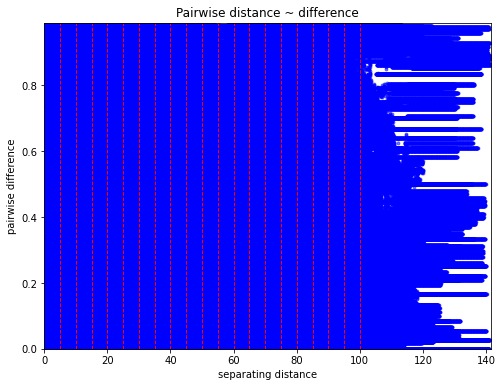

In [70]:
"""Therefore it is useful to group all point pairs
at the same distance lag together into one group, or bin"""

V1.distance_difference_plot()

C:\Users\Alexandre\anaconda3\lib\site-packages\skgstat\plotting\variogram_plot.py:96: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Alexandre\anaconda3\lib\site-packages\skgstat\plotting\variogram_plot.py:96: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Alexandre\anaconda3\lib\site-packages\skgstat\plotting\variogram_plot.py:96: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-72-c4d5e2224b5b>:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


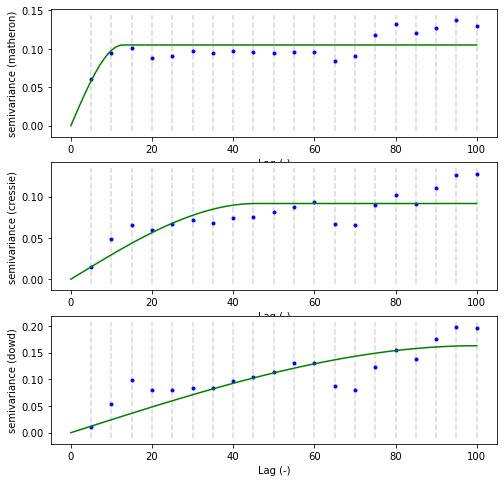

In [72]:
fig, _a = plt.subplots(3, figsize=(8,8))
axes = _a.flatten()

V1.plot(axes=axes[0], hist=False)

V1.estimator = 'cressie'
V1.plot(axes=axes[1], hist=False)

V1.estimator = 'dowd'
V1.plot(axes=axes[2], hist=False)


fig.show()


## ANNEXE

In [6]:
print("height :",dataset.height)
print("width :",dataset.width)
print("resolution :",dataset.res)
print("limites",dataset.bounds)

height : 7790
width : 6287
resolution : (0.039665999999996815, 0.03966599999997521)
limites BoundingBox(left=523552.2443436172, bottom=5366084.89130523, right=523801.62448561715, top=5366393.889445229)


### Fenêtrage

In [92]:
# 512 x 512 = 20.29 //
RAYON = 20 # en mètre
win_height = round(RAYON / dataset.res[0])
win_width  = round(RAYON / dataset.res[1])
#win_height = 6303
#win_width = 3421
print("Taille de la fenetre :",win_height,"x",win_width)
pt_c = [dataset.height //2,dataset.width // 2] # point central
pt_a = dataset.index(523610.58,5366280.18)




Taille de la fenetre : 504 x 504


In [93]:
"""Fenêtre centrée sur le mid de la carte"""
win = Window(pt_a[0],pt_a[1], win_height, win_width)
win_transform = dataset.window_transform(win)
w = dataset.read([1,2,3], window=win)
w.shape


(3, 504, 504)

<AxesSubplot:>

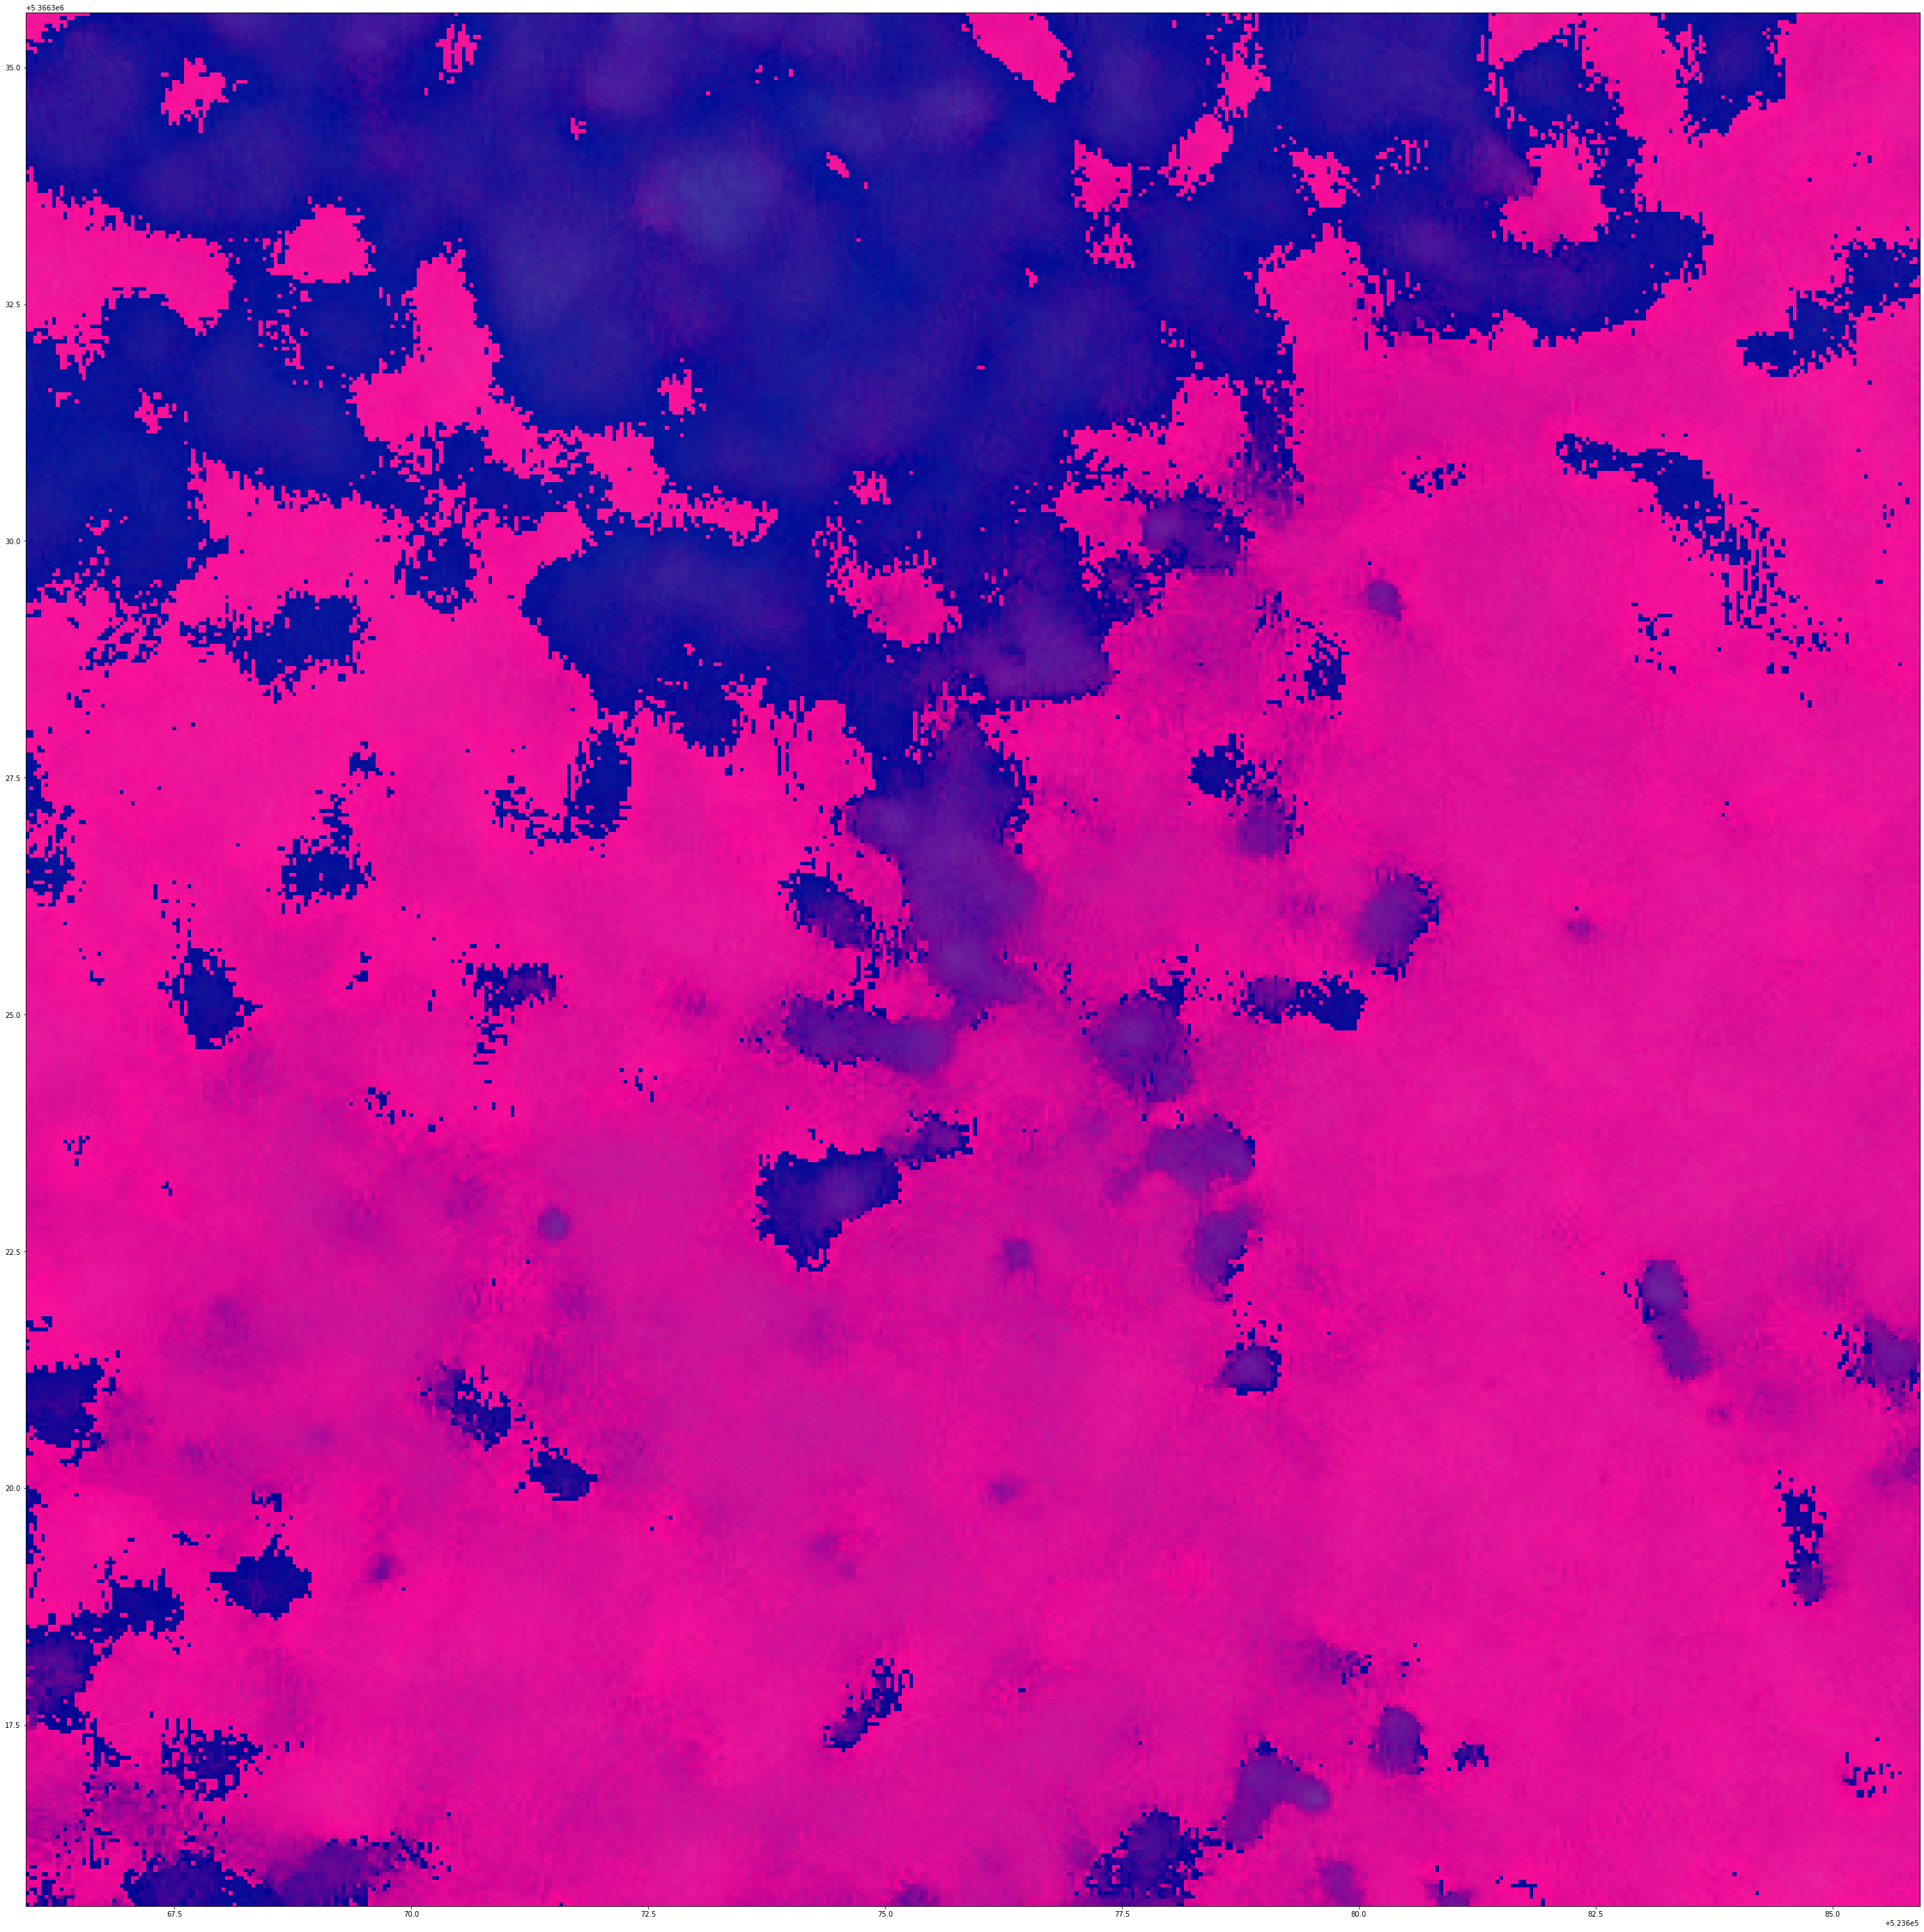

In [94]:
fig,axhsv = plt.subplots(1,figsize =(50,50))
show(w,transform = win_transform,ax = axhsv)

### Création des vecteurs x y band 1 band 2 band 3

In [95]:
x_start = win_transform[2]
x_res   = win_transform[0]
x_end   = x_start+(x_res*win.width)
print("x_end =",x_end)
y_end   = win_transform[5]
y_res   = win_transform[4]
y_start = y_end + (y_res*win.height)
print("y_start =",y_start)
dataset.index(x_start,y_start)

x_end = 523685.9187636171
y_start = 5366315.58876123


(1973, 2866)

In [96]:
with rio.open('./traitement_PIREN/vis_piren_phase_HSV.tif') as src :
    x = np.linspace(x_start,x_end,num = win.width)
    y = np.linspace(y_start,y_end,num = win.height)
    
    band_1 = []
    band_2 = []
    band_3 = []
    
    for j in range(len(x)) :
        for val in src.sample([(x[j],y[j])]): 
            print(val[0])
            band_1.append(val[0])
            band_2.append(val[1])
            band_3.append(val[2])
            
            

0.041667044
0.9444441
0.9166667
0.9444441
0.0
0.09999966
0.083333336
0.8333333
0.0
0.9444444
0.87500036
0.8888889
0.6666667
0.94444513
0.8333333
0.74999976
0.95833313
0.05555521
0.77777773
0.0
0.87499976
0.72222257
0.7500008
0.6666667
0.58333373
0.6666667
0.6666667
0.5
0.6666667
0.77777773
0.70833373
0.7666666
0.8749998
0.9166667
0.7916667
0.8333333
0.0
0.9444448
0.06666667
0.9166667
0.9444444
0.9444444
0.6666667
0.0
0.8333333
0.0
0.027777938
0.9375001
0.96666664
0.93939394
0.9259259
0.8958331
0.8611112
0.8939395
0.9090909
0.86111104
0.8611112
0.8076923
0.8750001
0.86666673
0.81249994
0.88095224
0.8809523
0.7962966
0.8666667
0.86111104
0.7916665
0.8333333
0.8333333
0.9666669
0.93333334
0.9166665
0.9166667
0.94444436
0.94444454
0.9374999
0.91666687
0.9074073
0.9333334
0.9090908
0.90909076
0.888889
0.8541665
0.85185206
0.8333333
0.9259259
0.8611113
0.90000033
0.9444441
0.8333333
0.8333333
0.7777783
0.75000066
0.72222257
0.7916668
0.8333333
0.8333333
0.8666668
0.88888854
0.8666667
0.88095

In [97]:
mapping = ['x','y','band 1','band 2','band 3']
DATA_WINDOW = pd.DataFrame(np.array([x,y,band_1,band_2,band_3]).T,columns=mapping)
DATA_WINDOW

,x,y,band 1,band 2,band 3
0,523665.927100,5.366316e+06,0.041667,0.022599,0.585035
1,523665.966844,5.366316e+06,0.944444,0.033898,0.588371
2,523666.006589,5.366316e+06,0.916667,0.024096,0.584362
3,523666.046334,5.366316e+06,0.944444,0.016854,0.582793
4,523666.086079,5.366316e+06,0.000000,0.032967,0.590250
...,...,...,...,...,...
499,523685.759784,5.366335e+06,0.916667,0.074468,0.599380
500,523685.799529,5.366335e+06,0.897436,0.068421,0.595925
501,523685.839274,5.366336e+06,0.878788,0.056122,0.591258
502,523685.879019,5.366336e+06,0.884615,0.067010,0.594474


## Création d'un CSV pour surfer

In [65]:
filename = './traitement_PIREN/WINDOW_20m.csv'
DATA_WINDOW.to_csv(filename,index = None)

###### As we already calculated an experimental variogram and find the spherical model in the skgstat.models sub-module, we can utilize e.g. curve_fit from scipy to fit the model using a least squares approach

In [73]:
from skgstat import models
from scipy.optimize import curve_fit
# set esimator back in case of 
V1.estimator = 'matheron'
V1.model = 'spherical'

# données issues du variogramme
xdata = V1.bins
ydata = V1.experimental
cof, cov =curve_fit(models.spherical, xdata, ydata) # Ne fonctionne pas 

C:\Users\Alexandre\anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


{'effective_range': 21.23779361074089,
 'estimator': 'matheron',
 'name': 'spherical',
 'nugget': 0,
 'sill': 0.00035257562373734275}


C:\Users\Alexandre\anaconda3\lib\site-packages\skgstat\plotting\variogram_plot.py:96: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


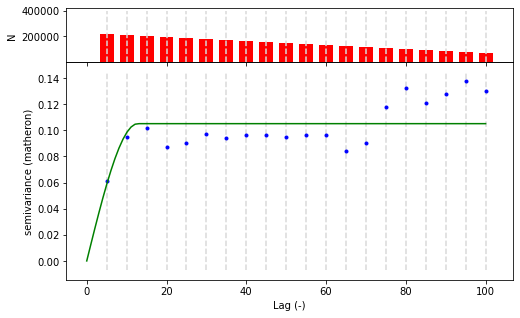

In [76]:
from pprint import pprint
V1.plot() ;
pprint(V3.describe())

## Toute l'image

In [318]:
print("height :",dataset.height)
print("width :",dataset.width)
print("resolution :",dataset.res)
print("limites",dataset.bounds)
dataset.transform

height : 7790
width : 6287
resolution : (0.039665999999996815, 0.03966599999997521)
limites BoundingBox(left=523552.2443436172, bottom=5366084.89130523, right=523801.62448561715, top=5366393.889445229)


Affine(0.039665999999996815, 0.0, 523552.2443436172,
       0.0, -0.03966599999997521, 5366393.889445229)

In [86]:
w = dataset.read(1, window=win)
X_START = dataset.transform[2]
X_RES   = dataset.transform[0]
X_END   = x_start+(x_res*dataset.width)
print("x_end =",X_END)
Y_END   = dataset.transform[5]
Y_RES   = dataset.transform[4]
Y_START = Y_END + (Y_RES*dataset.height)
print("y_start =",Y_START)
dataset.index(X_START,Y_START)

x_end = 523915.3072416171
y_start = 5366084.89130523


(7790, 0)

In [332]:
with rio.open('./traitement_PIREN/vis_piren_phase_HSV.tif') as src :
    X = np.linspace(X_START,X_END,num = dataset.width)
    Y = np.linspace(Y_START,Y_END,num = dataset.height)

    BAND_1 = []
    BAND_2 = []
    BAND_3 = []
    
    for j in range(len(X)) :
        for vals in src.sample([(X[j],Y[j])]): 
            BAND_1.append(vals[0])
            BAND_2.append(vals[1])
            BAND_3.append(vals[2])
            
            

In [336]:
print(len(BAND_1))
print(len(X))
print(len(Y))

6287
6287
7790


In [331]:
mapping = ['x','y','band 1','band 2','band 3']
DATA_HSV = pd.DataFrame(np.array([X,Y,band_1,band_2,band_3]).T,columns=mapping)

<ipython-input-331-a89bcff064d0>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  DATA_HSV = pd.DataFrame(np.array([X,Y,band_1,band_2,band_3]).T,columns=mapping)


ValueError: Shape of passed values is (5, 1), indices imply (5, 5)

## Example 

In [50]:
# Set an Coordinate array of shape(m,n)

coords = np.random.randint(0, 500, (300, 2))
coords.shape

(300, 2)

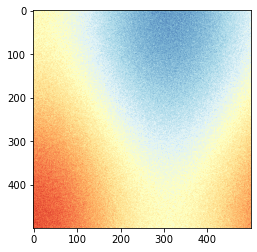

In [34]:
# apply the function to a meshgrid and add noise
xx, yy = np.mgrid[0:0.5 * np.pi:500j, 0:0.8 * np.pi:500j]
np.random.seed(42)
# generate a regular field
_field = np.sin(xx)**2 + np.cos(yy)**2 + 10
# add noise
np.random.seed(42)
z = _field + np.random.normal(0, 0.15, (500,  500))
plt.imshow(z, cmap='RdYlBu_r')

In [298]:
np.random.seed(42)
coords = np.random.randint(0, 500, (300, 2))
value = np.fromiter((z[c[0], c[1]] for c in coords), dtype=float)
coords.shape

(300, 2)

#### Technique de localisation 

In [155]:
"""To get the spatial coordinates of a pixel, use the dataset’s xy() method. The coordinates of the 
center of the image can be computed like this."""


dataset.xy(dataset.height // 2,dataset.width // 2)

(523676.9344146172, 5366239.370542229)

In [9]:
"""Data from a raster band can be accessed by the band’s index number"""
dataset.indexes
band1 = dataset.read(1)

In [150]:
"""Values from the array can be addressed by their row, column index."""
band1[dataset.height // 2, dataset.width // 2]


0.7619048

In [95]:
"""Fenetre 4 côtés """
Window.from_slices((row_start, row_stop), (col_start, col_stop))

NameError: name 'row_start' is not defined

In [183]:
x, y = (dataset.height // 2 , dataset.width // 2 )
dataset.index(523676.9344146172,5366239.370542229)

(3895, 3143)

In [14]:
all_band = dataset.read([1,2,3])

(3, 7790, 6287)

In [339]:
dataset.res[0]

0.039665999999996815

In [104]:
filename = './traitement_PIREN/vis_piren_phase_HSV.tif'
LONGUEUR = 10
with rio.open(filename) as dataset :
    #Value par défaut
    #win_height = 6303
    #win_width = 3421
    
    ls_index_target = [] # liste des valeurs indexées dans l'image
    win_height = round(LONGUEUR / dataset.res[0])
    win_width  = round(LONGUEUR / dataset.res[1])
    print("Taille de la fenetre :",win_height,"x",win_width)
    
    # Loop pour recuperer les coordonnées UTM et convertir en indice 
    for k in range(len(sensor_coord["SensorName"])) :
        x = sensor_coord["x"][k] 
        y = sensor_coord["y"][k]
        target = dataset.index(float(x),float(y))
        ls_index_target.append(target)
        
    ls_windows_param = [] # liste des paramètres dans la création d'une window
    dict_windows = {} # dict des targets : améliore la lisibilité
    
    for i,index_target in enumerate(ls_index_target) :
        win = Window(index_target[0],index_target[1],win_height,win_width)
        win_transform = dataset.window_transform(win)
        all_band = dataset.read([1,2,3],window = win) # en cas de visualisation
        
        dict_windows_param = {"win" : win,
                        "win_transform" : win_transform,
                       "all_band" : all_band,
                       "SensorName" : sensor_coord["SensorName"][i]}
        
        ls_windows.append(dict_windows_param)
        
        # Vecteurs linéaires avec valeurs uniforméments crées
        x_start = win_transform[2]
        x_res   = win_transform[0]
        x_end   = x_start+(float(x_res)*win.width)
        
        y_end   = win_transform[5]
        y_res   = win_transform[4]
        y_start = y_end + (float(y_res)*win.height)
        
        #print("x_end =",x_end)
        #print("y_start =",y_start)
        
        x = np.linspace(x_start,x_end,num = win.width)
        y = np.linspace(y_start,y_end,num = win.height)
    
        band_1 = []
        band_2 = []
        band_3 = []
        
        # Loop pour obtenir la valeur de chaque pt pour chaque band
        for j in range(len(x)) : # par du principe que le patch est carré
            for val in dataset.sample([(x[j],y[j])]): 
                band_1.append(val[0])
                band_2.append(val[1])
                band_3.append(val[2])
                
        mapping = ['x','y','band 1','band 2','band 3']
        DATA_WINDOW = pd.DataFrame(np.array([x,y,band_1,band_2,band_3],dtype = object).T,columns=mapping)
        DATA_WINDOW['SensorName'] = sensor_coord["SensorName"][i]
        dict_windows[sensor_coord["SensorName"][i]] = DATA_WINDOW
        

Taille de la fenetre : 252 x 252
